# Задание

Требуется создать ноутбук, в котором будут проведены эксперименты с инструментами sklearn.

1.   Произведём базовую подготовку данных

In [ ]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [ ]:
from sklearn.datasets import load_boston

boston_data = load_boston()
print(type(boston_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']

print(type(feature_data))
print(type(target_data))

print(feature_data.shape)
print(target_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


In [ ]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df['PRICE'] = target_data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
# Данный метод возвращает маску дубликатов
#   Если запись - дубликат, то в маске она будет True
# Получить DataFrame без дубликатов можно утем применения инвертированной маски
dup_mask = df.duplicated()

# А мы просто посмотрим сумму элементов и так убедимся, что дубликатов нет!
dup_mask.sum()

0

In [ ]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [ ]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [ ]:
# Сначала приведем к int, чтобы вместо 0.0 и 1.0 были значения 0 и 1
# Затем приведем к типу категорий
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


2.   Создадим baseline модель линейной регрессии

In [ ]:
from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


In [ ]:
from sklearn.linear_model import LinearRegression

# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Для отображения весов создадим функцию
def show_linear_model_weights(model, feature_names=None):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - (опционально) если передано, отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    if feature_names is None:  
        print(f'Weights: {weights}')
    else:
        # Функция zip() делает из двух списков один список пар значений
        pairs = zip(feature_names, weights)
        for pair in pairs:
            print(f'{pair[0]} | {pair[1]}')

    print(f'Bias: {bias}')

show_linear_model_weights(reg, X_train.columns)


----- Weights -----
CRIM | -0.1334701028529461
ZN | 0.03580891359323195
INDUS | 0.04952264522005543
CHAS | 3.119835116285394
NOX | -15.417060895306689
RM | 4.057199231645403
AGE | -0.010820835184926221
DIS | -1.3859982431608788
RAD | 0.24272733982224926
TAX | -0.00870223436566183
PTRATIO | -0.9106852081102881
B | 0.011794115892575632
LSTAT | -0.5471133128239569
Bias: 31.631084035691632


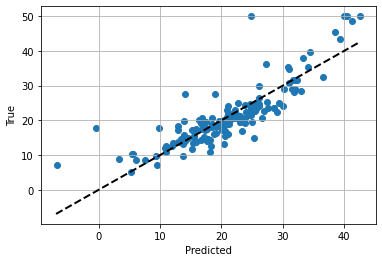

In [ ]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


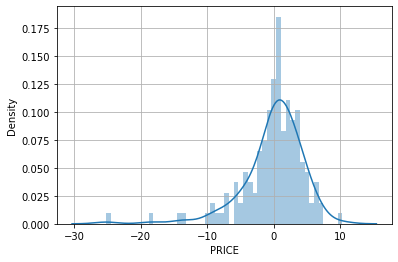

In [ ]:
y_residuals = y_pred-y_test
sns.distplot(y_residuals, bins=50)
plt.grid()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# При повторении кода лучшей практикой является создание функции 
#   для исключения дублирований
# Дублирование кода -> ошибки
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


3.   Произведём расширенный анализ данных

*   Оценим корреляцию признаков

In [ ]:
# Для примера выберем следующие признаки
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']

correlation_mtrx = df[features].corr()
correlation_mtrx

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787


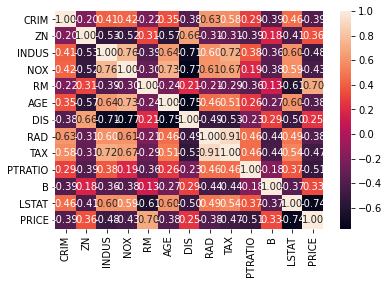

In [ ]:
# Два дополнительных аргумента добавляют числа на график и указывают формат вывода данных
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

*   Оценим распределение признаков


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


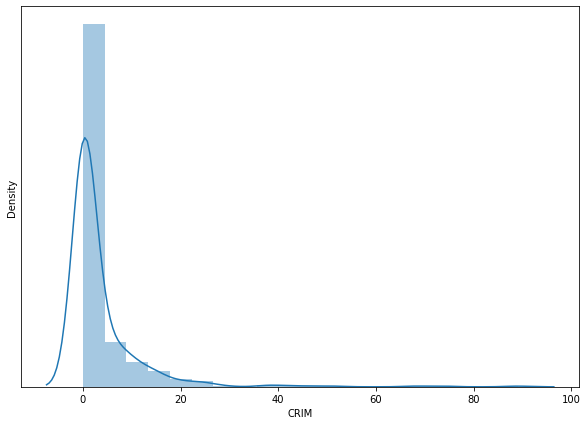

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


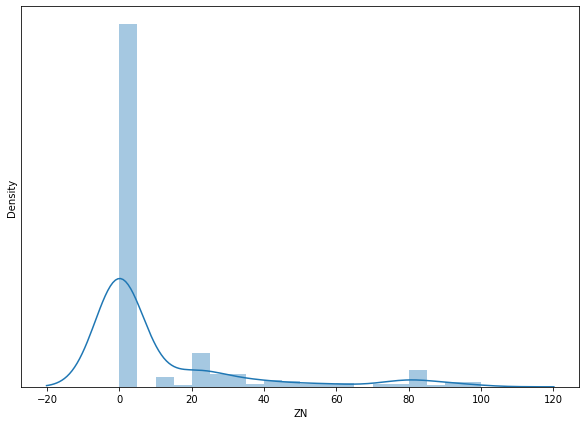

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


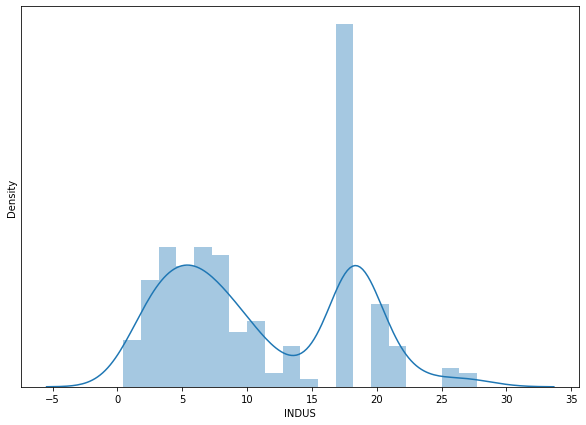

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


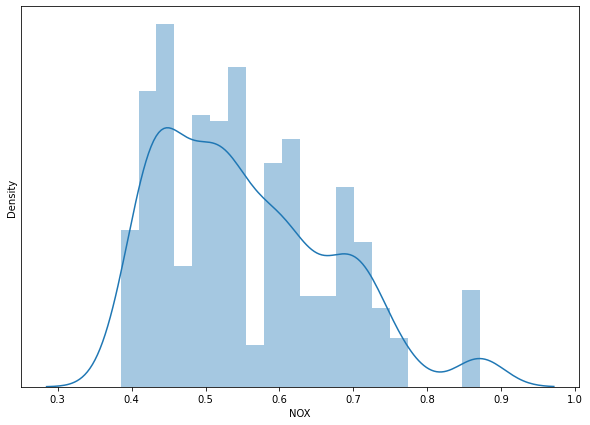

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


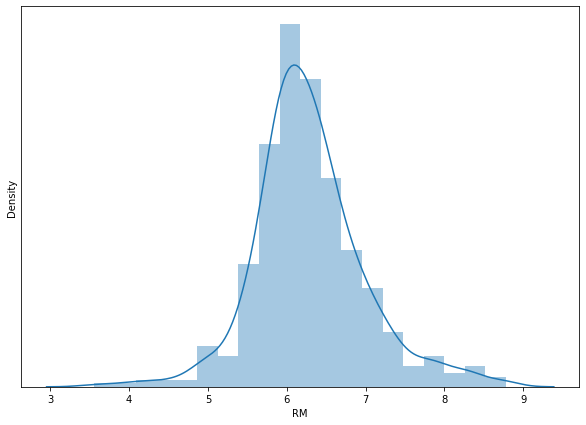

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


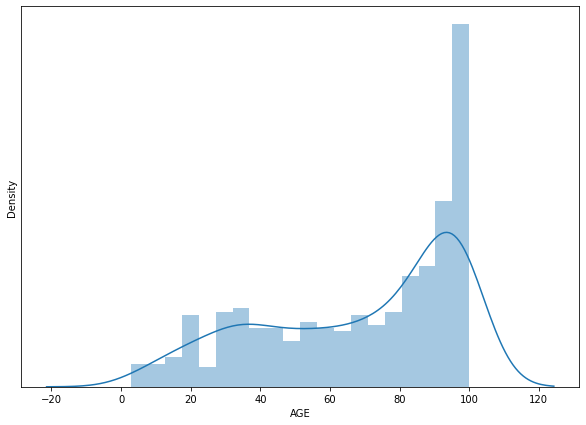

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


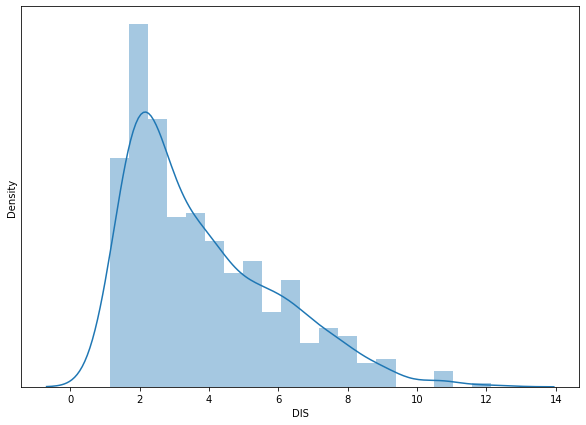

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


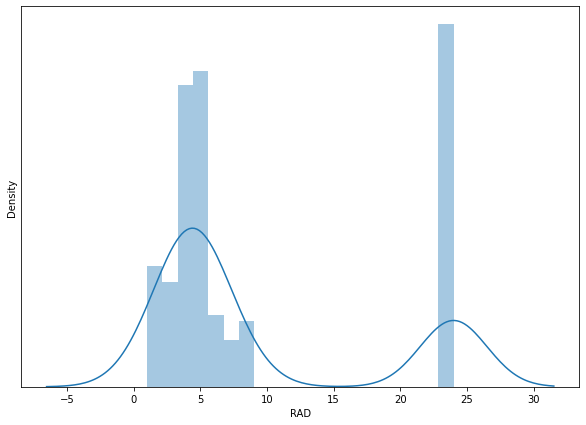

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


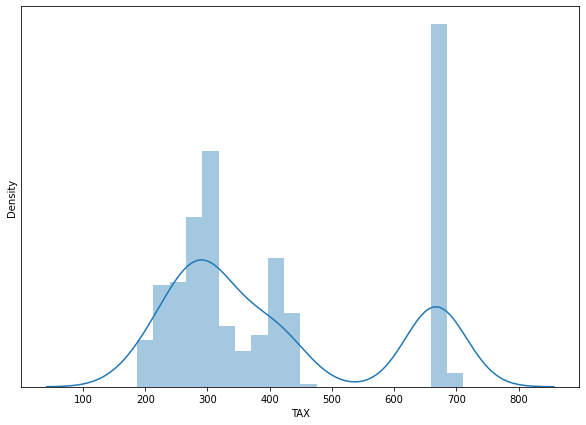

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


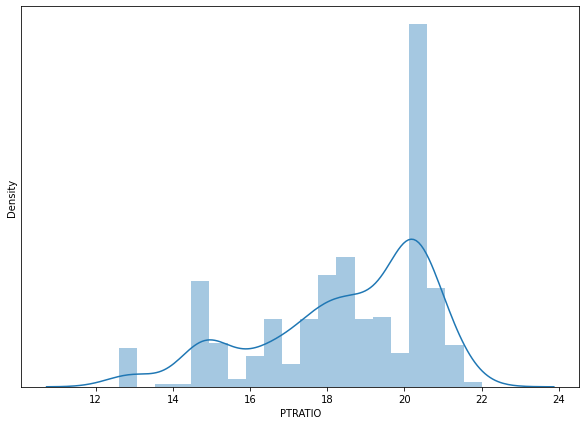

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


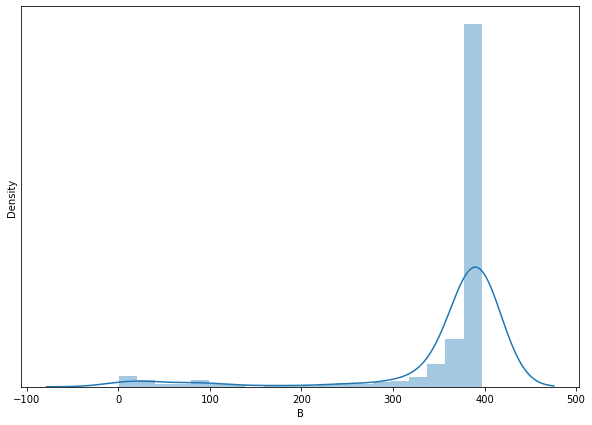

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


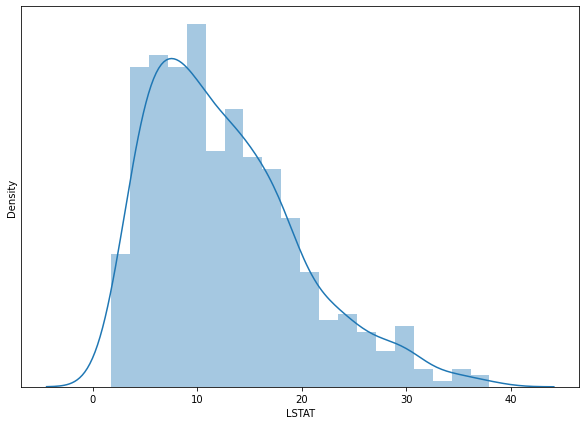

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


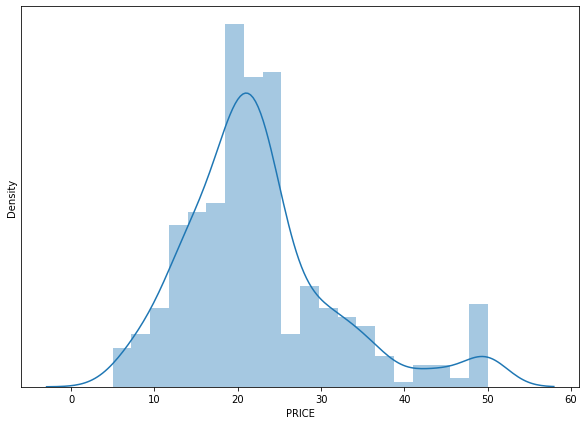

In [ ]:
for feat in features:
  plt.figure(figsize=[10, 7])
  sns.distplot(df[feat], bins=20)
  # Отключение меток на оси Y
  plt.yticks([])
  plt.show()

*   Оценим характер зависимости целевой переменной от каждого признака

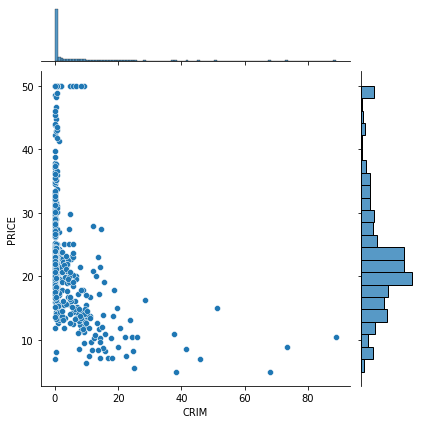

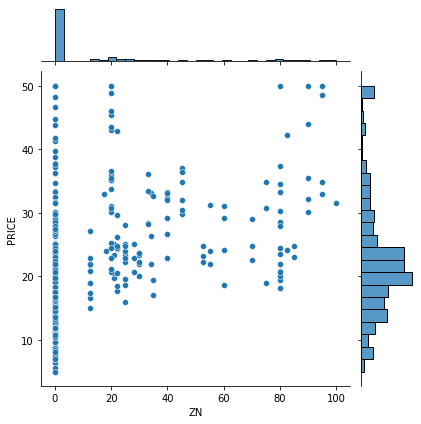

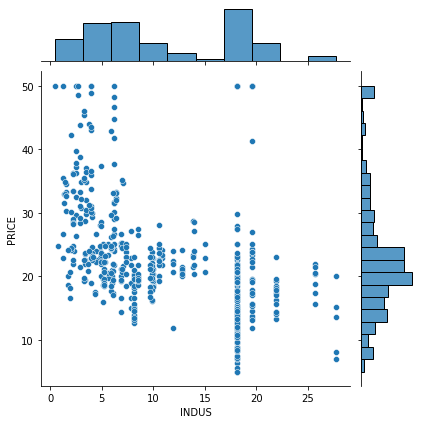

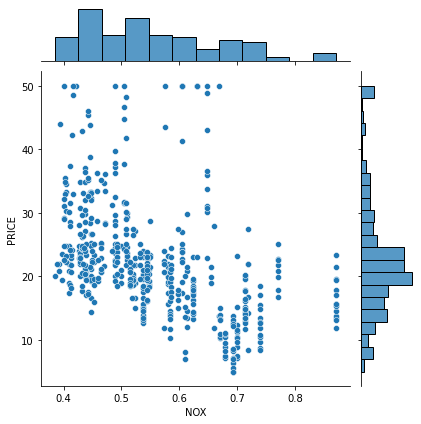

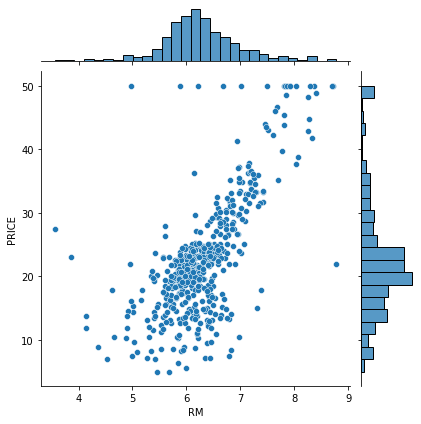

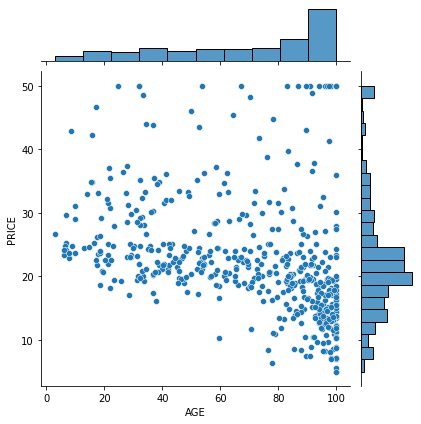

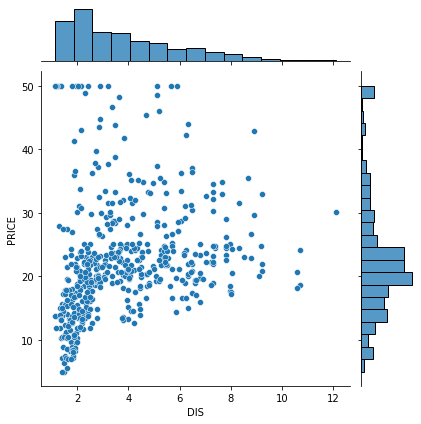

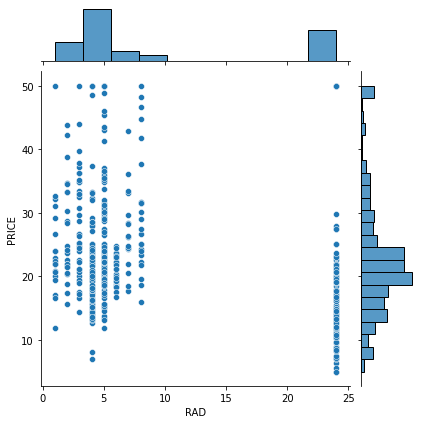

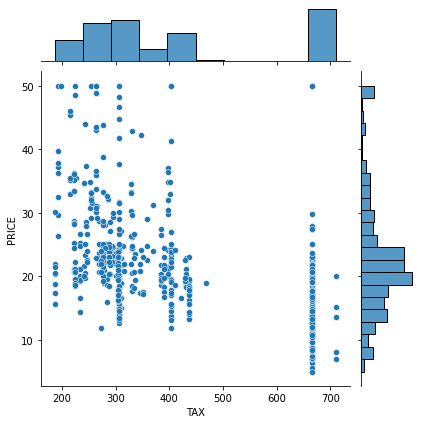

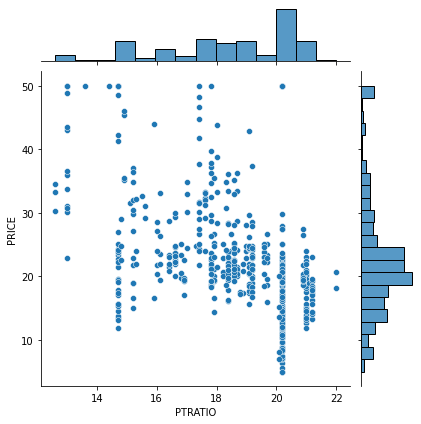

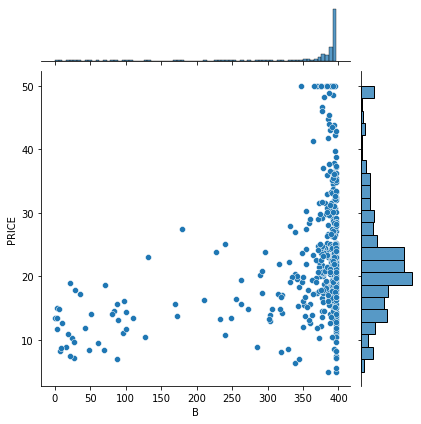

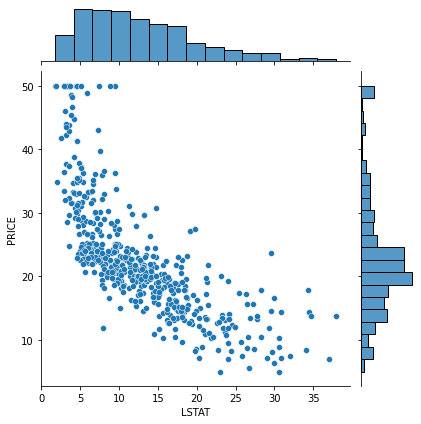

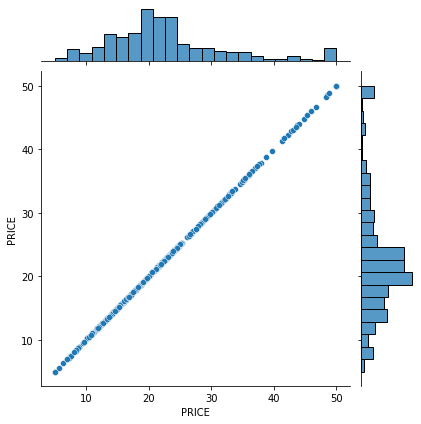

In [ ]:
for feat in features:
  sns.jointplot(x=feat, y="PRICE", data=df)

Вывод по результатам анализа: присутствует аномальное распределение точек, поэтому необходимо удалить выбросы.

4.   Изучим работу инструментов нормализации данных

*   Применим трансформер sklearn.preprocessing.StandardScaler к данным, отобразим распределения после обработки, обучим модель на обработанных данных и оцените показатели


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682065

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.638689926172821
  MAE: 3.162709871457406


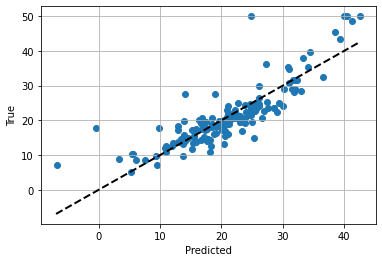

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

*   Применим трансформер sklearn.preprocessing.MinMaxScaler к данным, отобразим распределения после обработки, обучим модель на обработанных данных и оцените показатели


----- Weights -----
CRIM | -11.874453326332448
ZN | 3.4018467913571957
INDUS | 1.3138357776880198
CHAS | 3.1198351162853952
NOX | -7.492691595119078
RM | 19.949248622000347
AGE | -1.0507030964564752
DIS | -15.24168408021582
RAD | 5.5827288159117545
TAX | -4.559970807607127
PTRATIO | -8.560440956236727
B | 4.677310480676527
LSTAT | -19.82738645674022
Bias: 26.028229324073685

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682047

----- Evaluation for test -----
  R2: 0.7112260057484927
  RMSE: 4.638689926172824
  MAE: 3.1627098714574067


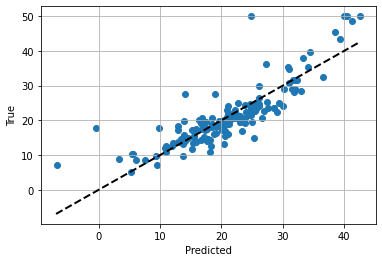

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

Сравним результаты и сделаем выводы: при использовании MinMax сильно изменились веса

5.   Изучим работу инструментов выравнивания распределений

*   Применим трансформер sklearn.preprocessing.PowerTransformer к данным, отобразим распределения после обработки, обучим модель на обработанных данных и оцените показатели

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.13156466464394423
ZN | 0.19951252047411283
INDUS | -0.661968941043374
CHAS | 0.8070988287388107
NOX | -1.593975913739194
RM | 1.953238668377283
AGE | 0.14000510013869283
DIS | -3.2702370734918667
RAD | 0.3842721775169
TAX | 6.661338147750939e-15
PTRATIO | -1.6118671671696452
B | 0.5688864225523941
LSTAT | -5.812179493282584
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671674226821155
  RMSE: 4.523845209628152
  MAE: 3.3452541600761636

----- Evaluation for test -----
  R2: 0.7412232713454906
  RMSE: 4.391156466464553
  MAE: 3.1620670158148196


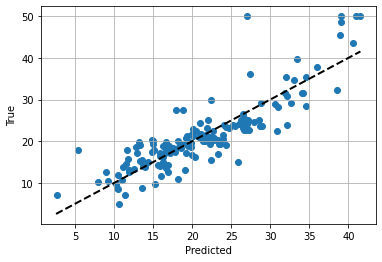

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

*   Применим трансформер sklearn.preprocessing.QuantileTransformer(output_distribution='normal') к данным, отобразим распределения после обработки, обучим модель на обработанных данных и оцените показатели

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))



----- Weights -----
CRIM | -0.6436215551896776
ZN | 0.2136504931088371
INDUS | -0.17880257287476875
CHAS | 0.26018524120763875
NOX | -1.0316416211746446
RM | 1.4017566758007836
AGE | -0.02195341592461203
DIS | -3.3851448585615316
RAD | 0.1010514822287012
TAX | -1.157250252265722
PTRATIO | -1.3505805423381212
B | -0.10849526852504174
LSTAT | -5.5311442521125285
Bias: 24.968537558402915

----- Evaluation for train -----
  R2: 0.7554172540431211
  RMSE: 4.636590829916763
  MAE: 3.4594000699690453

----- Evaluation for test -----
  R2: 0.7464716005585341
  RMSE: 4.346399182858186
  MAE: 3.1830447298707427


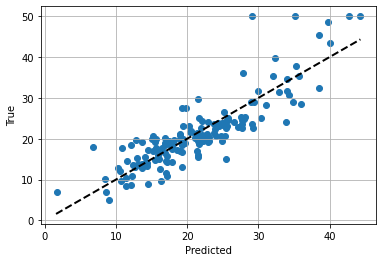

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

Сравним результаты и сделаем выводы: у PowerTrasformer выше R2, а у QuantileTransformer выше RMSE и MAE (если рассматривать выборку train)

6.   Исключим выбросы на уровне PRICE == 50 из данных, обучим модель и оценим показатели


----- Weights -----
CRIM | -0.12381878117351394
ZN | 0.04038991169297008
INDUS | -0.04633642800193789
CHAS | -0.029973239830924307
NOX | -14.688063333672863
RM | 3.333246719403874
AGE | -0.021294868200934354
DIS | -1.3881850773173994
RAD | 0.23160877762484414
TAX | -0.012433320325953387
PTRATIO | -0.8576286263011887
B | 0.006898412474272638
LSTAT | -0.3753130106657583
Bias: 37.5599334261054

----- Evaluation for train -----
  R2: 0.7798306337503477
  RMSE: 3.778282589754244
  MAE: 2.7961504147140688

----- Evaluation for test -----
  R2: 0.7538446825846039
  RMSE: 3.5951405792699194
  MAE: 2.7775138468973313


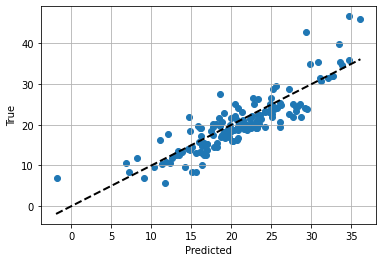

In [ ]:
df_tr = df[df['PRICE'] == 50].index
df_tr = df.drop(df_tr, axis=0)
# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df_tr[feature_names]
# y - истинные значения (разметка)
y = df_tr['PRICE']

X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)
reg = LinearRegression()
reg.fit(X_train_tr, y_train_tr)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_tr)
draw_predictions_plot(y_pred, y_test_tr)
evaluate_regressor(reg, X_train_tr, y_train_tr, 'train')
evaluate_regressor(reg, X_test_tr, y_test_tr, 'test')

7.   Оценим работу модели при исключении каждого признака [13 экспериментов] (результаты представим в виде таблицы DataFrame с указанием исключенного признака и показателей метрик)

In [ ]:
def eval_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)
    return r2_score_value, rmse_score, mae_score

In [ ]:
y = df['PRICE']
df_fin = pd.DataFrame(columns=['R2_train','R2_test','RMSE_train','RMSE_test','MAE_train','MAE_test'], 
index = list(feature_names))
for feat in feature_names:
  X = df.drop(columns=[feat, 'PRICE'])
  X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(
      # Передаются наборы, которые будут разделены в соответсвии с параметрами
      X, y, 
      # Задается размер обучающей выборки
      train_size=TRAIN_RATIO, 
      # Фиксируется состояние генератора случайных чисел 
      #   для сохранения повторяемости
      random_state=RANDOM_STATE
  )
  reg = LinearRegression()
  reg.fit(X_train_tr, y_train_tr)
  y_pred = reg.predict(X_test_tr)
  df_fin.loc[feat,['R2_train', 'RMSE_train', 'MAE_train']]=eval_regressor(reg, X_train_tr, y_train_tr, 'train')
  df_fin.loc[feat,['R2_test', 'RMSE_test', 'MAE_test']]=eval_regressor(reg, X_test_tr, y_test_tr, 'test')
df_fin

,R2_train,R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test
CRIM,0.735429,0.715061,4.82233,4.60778,3.3952,3.13734
ZN,0.740394,0.697831,4.77686,4.74505,3.39217,3.24995
INDUS,0.743151,0.71241,4.75144,4.62917,3.3615,3.14422
CHAS,0.736665,0.708814,4.81105,4.65802,3.37897,3.20433
NOX,0.735551,0.690537,4.82122,4.80198,3.36302,3.23687
RM,0.693006,0.683052,5.19458,4.85971,3.72381,3.49986
AGE,0.74316,0.713868,4.75135,4.61742,3.36037,3.12911
DIS,0.718693,0.670199,4.97251,4.95726,3.49345,3.33199
RAD,0.736878,0.688301,4.80911,4.8193,3.36305,3.28564
TAX,0.740817,0.698385,4.77298,4.7407,3.36438,3.24129


8.   Применим трансформер sklearn.preprocessing.PolynomialFeatures для генерации признака LSTAT в квадрате, обучим модель на данных с новым признаком, оценим работу модели


----- Weights -----
CRIM | -0.15280616090498653
ZN | 0.02008920443439443
INDUS | 0.06774065481869344
CHAS | 2.6057394717883113
NOX | -14.010539660889783
RM | 3.0828754394175246
AGE | 0.010937689839601488
DIS | -1.1883620995490953
RAD | 0.25074012252115635
TAX | -0.008665054355744092
PTRATIO | -0.7955990628936107
B | 0.00947021171891732
LSTAT | 1.3322676295501878e-14
Bias: 41.667234450470374

----- Evaluation for train -----
  R2: 0.7900154484992744
  RMSE: 4.296150987499626
  MAE: 3.103043927750793

----- Evaluation for test -----
  R2: 0.7734457360506537
  RMSE: 4.108680995278827
  MAE: 2.9527724878930814


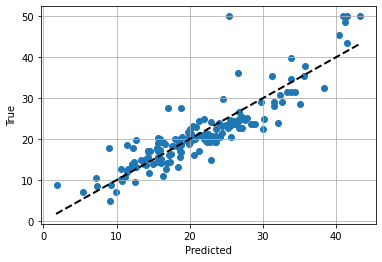

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

scaler = PolynomialFeatures(degree = 2)
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(np.array(X_train['LSTAT']).reshape(-1, 1))

# Стандартизация данных
X_train_scaled = scaler.transform(np.array(X_train['LSTAT']).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test['LSTAT']).reshape(-1, 1))
X_train_scaled = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

9.   Создадим базовую модель Ридж регрессии и оценим работу модели при различных альфа


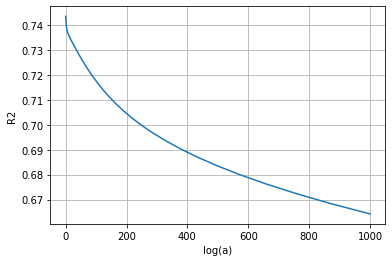

In [ ]:
from sklearn.linear_model import Ridge
log=np.logspace(-3,3,100)
R2_ridg=[]
for i in log:
    reg = Ridge(alpha=i);
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    R2_ridg.append(eval_regressor(reg, X_train, y_train, 'train')[0]) 
plt.plot(log,R2_ridg)
plt.xlabel('log(a)')
plt.ylabel('R2')
plt.grid()
plt.show()

10.   Испытаем работу модели при использовании различных методов нормализации и выравнивания распределений


----- Weights -----
CRIM | -1.0959333352863245
ZN | 0.7882002902172326
INDUS | 0.3141384584121459
CHAS | 0.8194327673352403
NOX | -1.7615911836191585
RM | 2.91992551807009
AGE | -0.30160551718902584
DIS | -2.902349023525914
RAD | 2.0127825519484306
TAX | -1.3761150026099584
PTRATIO | -2.0411130244314304
B | 1.0209642536988466
LSTAT | -3.8711605765922426
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.743482391414018
  RMSE: 4.748368933454408
  MAE: 3.3520641215891938

----- Evaluation for test -----
  R2: 0.7108071617209415
  RMSE: 4.6420527351841026
  MAE: 3.161026516515537


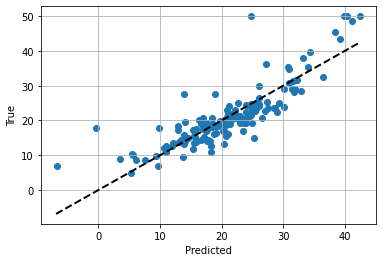

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -7.466381704215992
ZN | 2.3800868391937913
INDUS | 0.1720825326667058
CHAS | 3.5408013485213683
NOX | -5.504378531624222
RM | 18.352254498060088
AGE | -0.9337916685959564
DIS | -11.519844288810992
RAD | 3.767856861592313
TAX | -3.3678661319400227
PTRATIO | -8.268731162131754
B | 4.477526607284848
LSTAT | -18.92289026133223
Bias: 25.402289976271483

----- Evaluation for train -----
  R2: 0.7387251833812362
  RMSE: 4.792196740950352
  MAE: 3.3491646276433173

----- Evaluation for test -----
  R2: 0.711020981158772
  RMSE: 4.640336329192624
  MAE: 3.1087318709305003


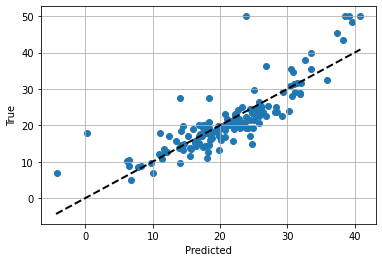

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())



----- Weights -----
CRIM | -0.13484405121519177
ZN | 0.1970006461082394
INDUS | -0.6622164726629481
CHAS | 0.8098867261192222
NOX | -1.5436689470029348
RM | 1.9644355840165202
AGE | 0.13325991495923653
DIS | -3.2146019494800386
RAD | 0.37506502820960147
TAX | 0.0
PTRATIO | -1.6098372912808876
B | 0.5705528509342792
LSTAT | -5.780487656832394
Bias: 23.01581920903956

----- Evaluation for train -----
  R2: 0.7671538602313817
  RMSE: 4.523976964245666
  MAE: 3.342412393327308

----- Evaluation for test -----
  R2: 0.740795451130297
  RMSE: 4.394784786716414
  MAE: 3.157433953239507


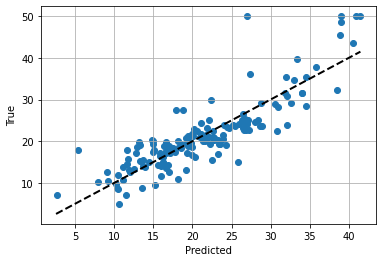

In [ ]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer()
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))



----- Weights -----
CRIM | -0.6345748611580135
ZN | 0.2121280386019434
INDUS | -0.18136341466531597
CHAS | 0.2623828908702728
NOX | -1.0242501187593551
RM | 1.4115574375153974
AGE | -0.020467502784717477
DIS | -3.3523848462210433
RAD | 0.09737976998366069
TAX | -1.1503159595664656
PTRATIO | -1.3504947696248601
B | -0.10792365515405362
LSTAT | -5.504220599808957
Bias: 24.974778160698214

----- Evaluation for train -----
  R2: 0.7554087270965972
  RMSE: 4.636671652497528
  MAE: 3.4579297420340493

----- Evaluation for test -----
  R2: 0.7464912158226579
  RMSE: 4.346231041109075
  MAE: 3.178893310311777


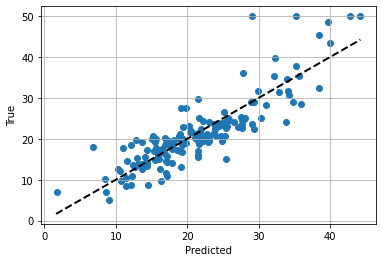

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(output_distribution='normal')
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

11.   Разработаем лучшую модель с необходимой предобработкой для решения задачи



----- Evaluation for train -----
  R2: 0.8100073172052747
  RMSE: 3.5098166392296632
  MAE: 2.63349935947252

----- Evaluation for test -----
  R2: 0.7873025834823739
  RMSE: 3.3418917149035527
  MAE: 2.569461281226277


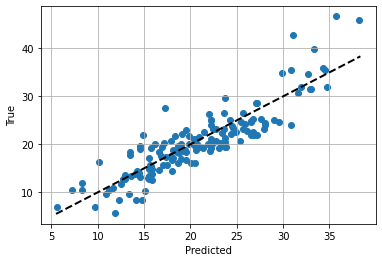

In [ ]:
df_tr = df[df['PRICE'] == 50].index
df_tr = df.drop(df_tr, axis=0)

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df_tr[feature_names]
# y - истинные значения (разметка)
y = df_tr['PRICE']

X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(
      # Передаются наборы, которые будут разделены в соответсвии с параметрами
      X, y, 
      # Задается размер обучающей выборки
      train_size=TRAIN_RATIO, 
      # Фиксируется состояние генератора случайных чисел 
      #   для сохранения повторяемости
      random_state=RANDOM_STATE
)

reg = Ridge(0.001)
scaler = PolynomialFeatures()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(np.array(X_train_tr['LSTAT']).reshape(-1, 1))

# Стандартизация данных
X_train_scaled = scaler.transform(np.array(X_train_tr['LSTAT']).reshape(-1, 1))
X_test_scaled = scaler.transform(np.array(X_test_tr['LSTAT']).reshape(-1, 1))
X_train_scaled = np.concatenate((np.array(X_train_tr.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test_tr.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train_tr)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test_tr)

evaluate_regressor(reg, X_train_scaled, y_train_tr, 'train')
evaluate_regressor(reg, X_test_scaled, y_test_tr, 'test')

Вывод по результатам: разработка лучшей модели позволила улучшать метрику R2

# Вопросы

- Какую задачу выполняет `QuantileTransformer`?
- За что отвечает аргумент конструктора `output_distribution` класса `QuantileTransformer`?
- В чем отличие Ридж регрессии от линейной регрессии?
- Что такое регуляризация?
- Как сказывается станартизация данных на результатах обучения с использованием регуляризации?
- В каких случаях нужно применять `StandardScaler`, а в каких `MinmaxScaler`?
- Как сказывается применение `QuantileTransformer` на результатах обучения с использованием регуляризации?
- Как влияет значение $\alpha$ на результаты обучения Ридж регрессии?

*   Используется для обработки данных и приводит равномерному или нормальному распределению
*   Выбор распределения для преобразованных данных
*   Ридж регрессия накладывает ограничения, что не позволяет результату сильно отклоняться
*   Минимизация с учётом величины значений весов
*   Метрика не изменилась
*   MinMax нужно использовать, когда нужно увеличить веса
*   Увеличиваются показатели R2 и MAE, но уменьшается RMSE по сравнению с MinMaxScaler и StandardScaler
*   С уменьшением альфа, увеличивается R2